In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import imageio
#!pip install folium
import folium
from folium.plugins import MarkerCluster
from ipywidgets import interactive
#!pip install interactive
import os
import json


In [2]:
%matplotlib inline

In [2]:
crime = pd.read_csv('/Users/shujiangtan/Documents/GitHub/BostonCrimeProject/crimes-in-boston/crimetodate.csv',encoding = 'latin')

crime.info()

NameError: name 'pd' is not defined

In [4]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
2,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
3,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"
4,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)"


In [1]:
#changing the datatype to date time and creating a separate column just for the date occured
crime['date_occured']=[i.split(' ')[0] for i in crime.OCCURRED_ON_DATE]
crime.info()

NameError: name 'crime' is not defined

In [13]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,date_occured
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)",2019-10-16
1,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13
2,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12
3,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12
4,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12


In [24]:
#dropping the original date column
crime = crime.drop([ 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION','UCR_PART'], axis=1)
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435655 entries, 0 to 435654
Data columns (total 15 columns):
INCIDENT_NUMBER       435655 non-null object
OFFENSE_CODE_GROUP    426840 non-null object
DISTRICT              433439 non-null object
REPORTING_AREA        435655 non-null object
SHOOTING              10562 non-null object
OCCURRED_ON_DATE      435655 non-null object
YEAR                  435655 non-null int64
MONTH                 435655 non-null int64
DAY_OF_WEEK           435655 non-null object
HOUR                  435655 non-null int64
STREET                422330 non-null object
Lat                   399636 non-null float64
Long                  399636 non-null float64
Location              435655 non-null object
date_occured          435655 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 49.9+ MB


In [3]:
crime.head()

NameError: name 'crime' is not defined

In [49]:
#replace Values in Shooting variable into 0,1
crime['SHOOTING'] = crime['SHOOTING'].replace(to_replace = np.nan, value =0) 
crime['SHOOTING'] = crime['SHOOTING'].replace(to_replace = 'Y', value=1)
#Removing Null Lat & Long.
crime = crime[(crime.Lat.notnull()) | (crime.Long.notnull())]
crime.info()
#crime.to_csv('/Users/shujiangtan/Documents/GitHub/BostonCrimeProject/crimes-in-boston/cleancrimetodate.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 399636 entries, 1 to 427142
Data columns (total 15 columns):
INCIDENT_NUMBER       399636 non-null object
OFFENSE_CODE_GROUP    399636 non-null object
DISTRICT              397816 non-null object
REPORTING_AREA        399636 non-null object
SHOOTING              399636 non-null int64
OCCURRED_ON_DATE      399636 non-null object
YEAR                  399636 non-null int64
MONTH                 399636 non-null int64
DAY_OF_WEEK           399636 non-null object
HOUR                  399636 non-null int64
STREET                397111 non-null object
Lat                   399636 non-null float64
Long                  399636 non-null float64
Location              399636 non-null object
date_occured          399636 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 48.8+ MB


In [27]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,date_occured
1,I192082859,Auto Theft,E18,519,0,2019-10-13 09:28:24,2019,10,Sunday,9,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13
2,I192082751,Auto Theft,E18,493,0,2019-10-12 20:11:26,2019,10,Saturday,20,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12
3,I192082680,Auto Theft,D14,794,0,2019-10-12 15:12:43,2019,10,Saturday,15,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12
4,I192082577,Auto Theft,D4,130,0,2019-10-12 04:41:52,2019,10,Saturday,4,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12
5,I192079582,Auto Theft,A15,47,0,2019-10-02 08:08:49,2019,10,Wednesday,8,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02


min data date : 2015-06-15 00:00:00
max data date : 2019-10-13 09:28:24
Incomplete year data on 2015 & 2019


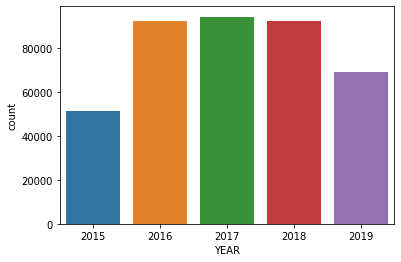

In [28]:
sns.countplot("YEAR", data = crime)
print("min data date :", min(crime.OCCURRED_ON_DATE))
print("max data date :", max(crime.OCCURRED_ON_DATE))
print("Incomplete year data on 2015 & 2019")

In [29]:
#plotting Crime Distribution by Day of Week and Comparing the years
def month(x):
    return sns.countplot("MONTH", data = crime[crime.YEAR == x])
interactive(month,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

In [33]:
#plotting Crime Distribution by Day of Week and Comparing the years
def week(x):
    return sns.countplot("DAY_OF_WEEK", order=crime.DAY_OF_WEEK.value_counts().index, data = crime[crime.YEAR == x])
interactive(week,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

In [34]:
#plotting Crime Distribution by hour
#result = Peaks in the Afternoon (4pm,16:00 to 7pm, 19:00) -- 
#this is true across all 4 years
def hour(x):
    return sns.countplot("HOUR", data = crime[crime.YEAR == x])
interactive(hour,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

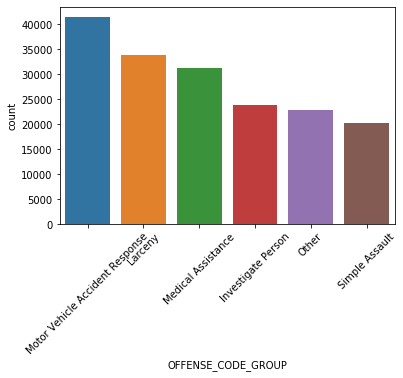

In [35]:
##display top 6 frequent offense during the whole day
order = crime['OFFENSE_CODE_GROUP'].value_counts().head(6).index
sns.countplot(data = crime, x='OFFENSE_CODE_GROUP', order = order)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

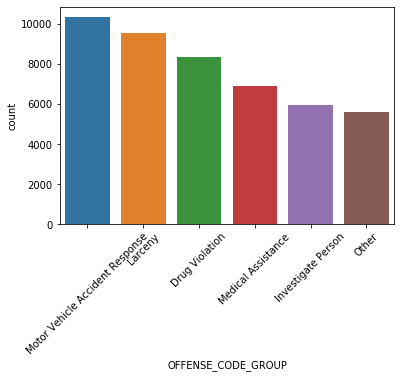

In [36]:
##display top 6 frequent offense during the crime peak hours (16:00 to 19:00)
hr = crime[(crime.HOUR >= 16) & (crime.HOUR <=19)]
order = hr['OFFENSE_CODE_GROUP'].value_counts().head(6).index
sns.countplot(data = hr, x='OFFENSE_CODE_GROUP', order = order)
plt.xticks(rotation=45)

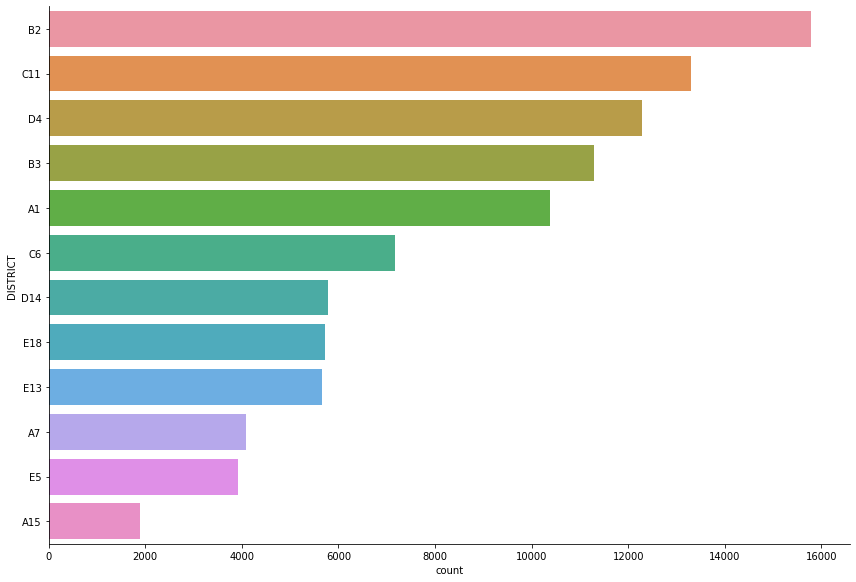

In [37]:
##Offense Group During Peak Time (4pm to 7 pm)
sns.catplot(y='DISTRICT',
           kind='count',
            height=8, 
            aspect=1.5,
            order=hr.DISTRICT.value_counts().index,
           data=hr)

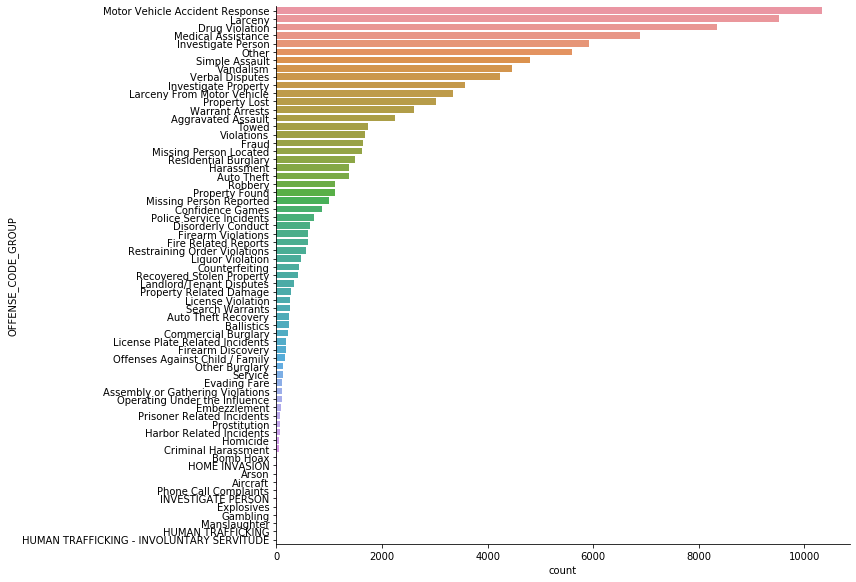

In [38]:
##Offense Group During Peak Time (4pm to 7 pm)
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=hr.OFFENSE_CODE_GROUP.value_counts().index,
           data=hr)

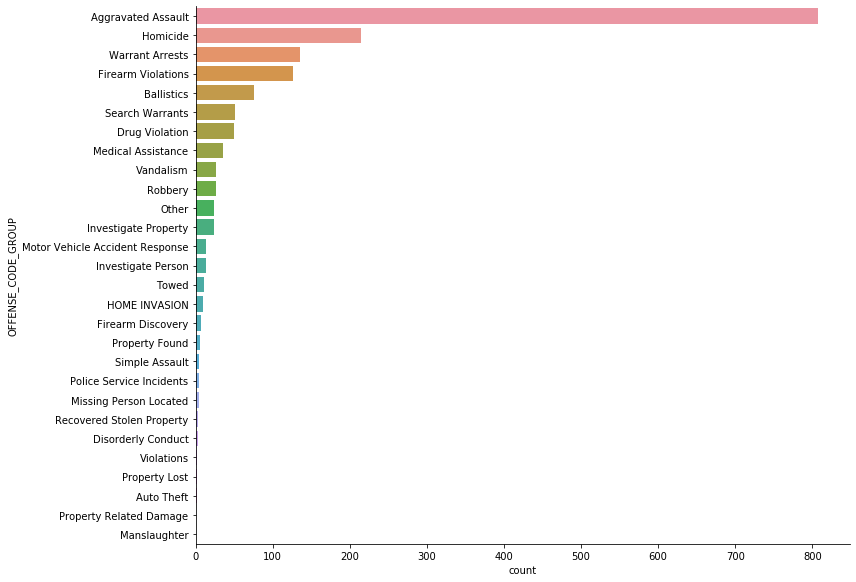

In [39]:
#type of offense code where there is shootings
shtgs = crime[crime.SHOOTING == 1]
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=shtgs.OFFENSE_CODE_GROUP.value_counts().index,
           data=shtgs)

In [65]:
#Finding areas where there is more than 7 crime incidents
tmp = crime.groupby('INCIDENT_NUMBER')['YEAR'].count().sort_values(ascending = False)
tmp = pd.DataFrame({'INCIDENT_NUMBER': tmp.index, 'NUM_RECORDS': tmp.values})
seriousCrimes = crime.merge(tmp[tmp['NUM_RECORDS'] > 7], on = 'INCIDENT_NUMBER', how = 'inner')
seriousCrimes.info()
#seriousCrimes.to_csv('/Users/shujiangtan/Documents/GitHub/BostonCrimeProject/crimes-in-boston/crime_over_7.csv')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 587
Data columns (total 16 columns):
INCIDENT_NUMBER       588 non-null object
OFFENSE_CODE_GROUP    588 non-null object
DISTRICT              588 non-null object
REPORTING_AREA        588 non-null object
SHOOTING              588 non-null int64
OCCURRED_ON_DATE      588 non-null object
YEAR                  588 non-null int64
MONTH                 588 non-null int64
DAY_OF_WEEK           588 non-null object
HOUR                  588 non-null int64
STREET                572 non-null object
Lat                   588 non-null float64
Long                  588 non-null float64
Location              588 non-null object
date_occured          588 non-null object
NUM_RECORDS           588 non-null int64
dtypes: float64(2), int64(5), object(9)
memory usage: 78.1+ KB


In [67]:
seriousCrimes3 = seriousCrimes2.dropna()
seriousCrimes3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 587
Data columns (total 5 columns):
OFFENSE_CODE_GROUP    572 non-null object
STREET                572 non-null object
Lat                   572 non-null float64
Long                  572 non-null float64
NUM_RECORDS           572 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 26.8+ KB


In [68]:
# Used this tutorial: https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1
boston = folium.Map(location = [seriousCrimes3['Lat'].mean(), 
                                  seriousCrimes3['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in seriousCrimes3.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = 'Offense Code:'+row.OFFENSE_CODE_GROUP+'.\n'+'Street:'+
                               row.STREET))

boston.add_child(mc)

boston

In [72]:
tmp = crime.groupby('INCIDENT_NUMBER')['YEAR'].count().sort_values(ascending = False)
tmp = pd.DataFrame({'INCIDENT_NUMBER': tmp.index, 'NUM_RECORDS': tmp.values})
seriousCrimes = crime.merge(tmp[tmp['NUM_RECORDS'] > 7], on = 'INCIDENT_NUMBER', how = 'inner')
seriousCrimes = seriousCrimes[['INCIDENT_NUMBER', 'Lat','Long']].drop_duplicates()[['Lat','Long']].dropna()
seriousCrimes.info()
seriousCrimes.to_csv('/Users/shujiangtan/Documents/GitHub/BostonCrimeProject/crimes-in-boston/crime_over_7_unique.csv')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 577
Data columns (total 2 columns):
Lat     59 non-null float64
Long    59 non-null float64
dtypes: float64(2)
memory usage: 1.4 KB


In [70]:
boston = folium.Map(location = [seriousCrimes['Lat'].mean(), 
                                  seriousCrimes['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in seriousCrimes.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,  row.Long]))

boston.add_child(mc)

boston

In [73]:
###shooting data
shtng = crime[(crime.SHOOTING == 1) & (crime.DISTRICT.notnull()) & (crime.Lat.notnull()) & (crime.Long.notnull())]

boston1 = folium.Map(location = [shtng['Lat'].mean(), 
                                  shtng['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in shtng.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = row.OFFENSE_CODE_GROUP))

boston1.add_child(mc)

boston1

# http://geojson.io/#map=2/20.0/0.0

In [76]:
#path = os.path.join('data','path.json')

In [75]:
'''# Used this tutorial: https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1
boston = folium.Map(location = [seriousCrimes3['Lat'].mean(), 
                                  seriousCrimes3['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in seriousCrimes3.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = 'Offense Code:'+row.OFFENSE_CODE_GROUP+'.\n'+'Street:'+
                               row.STREET))

#boston.add_child(mc)
'''


"# Used this tutorial: https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1\nboston = folium.Map(location = [seriousCrimes3['Lat'].mean(), \n                                  seriousCrimes3['Long'].mean()], \n                      zoom_start = 12)\nmc = MarkerCluster()\n#creating a Marker for each point. \nfor row in seriousCrimes3.itertuples():\n    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = 'Offense Code:'+row.OFFENSE_CODE_GROUP+'.\n'+'Street:'+\n                               row.STREET))\n\n#boston.add_child(mc)\n"

In [79]:
!brew install pandoc-citeproc



/bin/sh: brew: command not found
